# Erdio: Testing Classifiers

Testing audio classifiers for Project Erdio, an urban environmental sound classifier.

Team members (alphabetical order): Matthew Frick, Matthew Heffernan, Paul Jredini

Goal: Classify sounds for key stakeholders (see Stakeholder and KPI documentation).

In those notebook, we explore a variety of different classifiers in the quest for an optimal classifier. We also investigate feature selection.

## Setup: Load packages and define lists

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Standard sklearn processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# sklearn Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

## import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define shortcuts for classifiers
names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "ExtraTrees",
    "Boosted RF",
    "GradientBoosting",
    "Stacking"
]

# Collect classifiers into an iterable
## All the hyperparameters are chosen for reasonable, albeit not tuned, performance.
scaled_classifiers = [
    make_pipeline(RobustScaler(), LogisticRegression(max_iter=10000)),
    make_pipeline(RobustScaler(), KNeighborsClassifier(5,n_jobs=4)),
    make_pipeline(RobustScaler(), SVC(kernel="linear", C=0.025)),
    make_pipeline(RobustScaler(), SVC(gamma=2, C=1)),
    make_pipeline(RobustScaler(), DecisionTreeClassifier(max_depth=15)),
    make_pipeline(RobustScaler(), RandomForestClassifier(max_depth=15, n_estimators=500,n_jobs=4)),
    make_pipeline(RobustScaler(), MLPClassifier(alpha=0.01, max_iter=1000,early_stopping=True)),
    make_pipeline(RobustScaler(), AdaBoostClassifier()),
    make_pipeline(RobustScaler(), GaussianNB()),
    make_pipeline(RobustScaler(), QuadraticDiscriminantAnalysis()),
    make_pipeline(RobustScaler(), LinearDiscriminantAnalysis()),
    make_pipeline(RobustScaler(), ExtraTreesClassifier(n_estimators=500, max_depth=15)),
    make_pipeline(RobustScaler(), AdaBoostClassifier(RandomForestClassifier(max_depth=15, n_estimators=500,n_jobs=4))),
    make_pipeline(RobustScaler(), GradientBoostingClassifier()),
]

classifiers = [
    LogisticRegression(max_iter=10000),
    KNeighborsClassifier(5,n_jobs=4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=15, n_estimators=500,n_jobs=4),
    MLPClassifier(alpha=0.01, max_iter=1000,early_stopping=True),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    ExtraTreesClassifier(n_estimators=500, max_depth=15),
    AdaBoostClassifier(RandomForestClassifier(max_depth=15, n_estimators=500,n_jobs=4)),
    GradientBoostingClassifier(),
    StackingClassifier(estimators=[('LDA', make_pipeline(StandardScaler(),LinearDiscriminantAnalysis())),
    ('rf', RandomForestClassifier(max_depth=15,n_estimators=1000, random_state=42))
], final_estimator=LogisticRegression(max_iter=5000))
]

%matplotlib inline

## Setup: Loading data, choosing features

In [21]:
# Keys for classifier 

full_classify_keys = [
 'eq_0',
 'eq_10',
 'eq_20',
 'eq_30',
 'eq_40',
 'eq_60',
 'eq_80',
 'eq_120',
 'eq_160',
 'eq_230',
 'eq_300',
 'eq_450',
 'eq_600',
 'eq_900',
 'eq_1200',
 'eq_1800',
 'eq_2400',
 'eq_3700',
 'eq_5000',
 'eq_7500',
 'eq_10000',
 'eq_15000',
 'eq_20000',
 'crestfactor',
 'salience',
 'harmonic_power',
 'percussive_power',
 'harmonic_hits',
 'percussive_hits',
 'power_ratio',
 'hits_ratio',
 'roll_32.spec_flatness.median',
 'roll_32.spec_flatness.iqr',
 'roll_32.spec_centroid.median',
 'roll_32.spec_bandwidth.median',
 'roll_32.spec_bandwidth.std',
 'roll_32.y_mw_zcr',
 'roll_64.spec_flatness.median',
 'roll_64.spec_flatness.iqr',
 'roll_64.spec_centroid.median',
 'roll_64.spec_bandwidth.median',
 'roll_64.spec_bandwidth.std',
 'roll_64.y_mw_zcr',
 'roll_128.spec_flatness.median',
 'roll_128.spec_flatness.iqr',
 'roll_128.spec_centroid.median',
 'roll_128.spec_bandwidth.median',
 'roll_128.spec_bandwidth.std',
 'roll_128.y_mw_zcr',
 'roll_64.logbands_mw_5.0',
 'roll_64.logbands_mw_5.1',
 'roll_64.logbands_mw_5.2',
 'roll_64.logbands_mw_5.3',
 'roll_64.logbands_mw_5.4',
 'roll_64.logbands_mw_10.0',
 'roll_64.logbands_mw_10.1',
 'roll_64.logbands_mw_10.2',
 'roll_64.logbands_mw_10.3',
 'roll_64.logbands_mw_10.4',
 'roll_64.logbands_mw_10.5',
 'roll_64.logbands_mw_10.6',
 'roll_64.logbands_mw_10.7',
 'roll_64.logbands_mw_10.8',
 'roll_64.logbands_mw_10.9',
 'roll_64.logbands_mw_20.0',
 'roll_64.logbands_mw_20.1',
 'roll_64.logbands_mw_20.2',
 'roll_64.logbands_mw_20.3',
 'roll_64.logbands_mw_20.4',
 'roll_64.logbands_mw_20.5',
 'roll_64.logbands_mw_20.6',
 'roll_64.logbands_mw_20.7',
 'roll_64.logbands_mw_20.8',
 'roll_64.logbands_mw_20.9',
 'roll_64.logbands_mw_20.10',
 'roll_64.logbands_mw_20.11',
 'roll_64.logbands_mw_20.12',
 'roll_64.logbands_mw_20.13',
 'roll_64.logbands_mw_20.14',
 'roll_64.logbands_mw_20.15',
 'roll_64.logbands_mw_20.16',
 'roll_64.logbands_mw_20.17',
 'roll_64.logbands_mw_20.18',
 'roll_64.logbands_mw_20.19']

In [3]:
# Only keys for the equalizer

eq_keys = [ 'eq_0',
 'eq_10',
 'eq_20',
 'eq_30',
 'eq_40',
 'eq_60',
 'eq_80',
 'eq_120',
 'eq_160',
 'eq_230',
 'eq_300',
 'eq_450',
 'eq_600',
 'eq_900',
 'eq_1200',
 'eq_1800',
 'eq_2400',
 'eq_3700',
 'eq_5000',
 'eq_7500',
 'eq_10000',
 'eq_15000',
 'eq_20000']

In [4]:
# Load data

features_equalizer = pd.read_csv('large_data/eq_harmony_combined.csv') # Equalizer and musical features
features = pd.read_csv('large_data/engineered_features_full1.csv', index_col=0) # Additional features
features_f0 = pd.read_csv('large_data/engineered_features_f0_full1.csv', index_col=0) # Addiitonal features
features_df = pd.concat([features_equalizer, features, features_f0], axis=1)

#features_df = features_frick
keys = list(features_df.keys())

In [5]:
# Scaling equalizer keys to bring them onto a more comparable scale

for eq in eq_keys:
    features_df[eq] = np.log10(features_df[eq])

In [6]:
# Define power and hits ratios between percussive and harmonic features

features_df['power_ratio'] = np.log10(features_df['percussive_power'].values / (features_df['harmonic_power'].values))
features_df['hits_ratio'] = np.log10(features_df['percussive_hits'].values / (features_df['harmonic_hits'].values + 1e-1) + 5e-4)

In [7]:
use_all = False # True # Use all features to predict
if use_all:
    classify_keys = keys[1:-1] # don't include class or fold

In [8]:
features_df.describe()

,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,eq_230,...,range_high.f0_stats.f0_min,range_high.f0_signal,range_low.f0_stats.f0_mean,range_low.f0_stats.f0_median,range_low.f0_stats.f0_std,range_low.f0_stats.f0_iqr,range_low.f0_stats.f0_max,range_low.f0_stats.f0_min,power_ratio,hits_ratio
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,...,6372.000000,8732.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,8732.000000,8732.000000
mean,0.785337,0.892642,0.989648,1.060456,1.201832,1.287808,1.357483,1.389817,1.414340,1.419566,...,1103.624678,0.411027,407.557234,405.344046,57.728063,84.702441,508.987818,317.205632,-0.995106,-1.640759
std,0.935234,0.925641,0.918903,0.900866,0.855738,0.815388,0.752803,0.719806,0.688163,0.662756,...,1495.181558,0.362974,488.222531,494.152942,101.585604,177.640426,592.026303,414.434577,2.274398,1.034565
min,-3.364845,-3.267241,-3.225991,-3.199969,-2.976491,-2.968993,-2.963378,-2.782332,-2.558243,-2.361910,...,523.251131,0.000000,65.406391,65.406391,0.000000,0.000000,65.406391,65.406391,-7.160499,-3.301030
25%,0.239100,0.353751,0.466158,0.559964,0.715394,0.827518,0.913237,0.963902,1.008940,1.032472,...,523.251131,0.000000,72.582150,71.326176,3.876392,2.823342,86.304251,65.406391,-2.398749,-2.303590
50%,0.837194,0.947724,1.051760,1.123707,1.302480,1.395580,1.470632,1.495065,1.535516,1.528382,...,523.251131,0.364162,110.644597,105.641024,9.832948,11.462293,133.870387,79.599808,-1.150139,-1.510981
75%,1.419438,1.536283,1.617141,1.673535,1.798016,1.878433,1.905592,1.911889,1.905981,1.900069,...,744.275557,0.757225,594.437367,583.946767,61.613479,70.170440,770.522378,440.000000,-0.037105,-0.946498
max,3.549806,3.336024,3.192284,3.135053,3.076486,3.004971,2.983684,3.013882,2.948173,2.928276,...,8040.259669,0.994220,2086.988685,2093.004522,959.633231,1944.658526,2093.004522,2080.949703,10.470580,2.466889


In [9]:
# Try grouping sounds into families of interest
# Result is not succesful, but leaving infrastructure in place.

#features_df['family'] = features_df['class'].replace({'air_conditioner':0, 'car_horn':0, 'children_playing':0, 'dog_bark':0, 'drilling':0, 'engine_idling':0, 'gun_shot':1, 'jackhammer':0, 'siren':0, 'street_music':0},inplace=False)
#familylabels = {'not gunshot':0, 'gunshot':1}.keys()

In [10]:
# Encode classes into numerical values
features_df.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
                'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9},inplace=True)

In [11]:
classlabels = {'air_conditioner':0, 'car_horn':1, 'children_playing':2, 
               'dog_bark':3, 'drilling':4, 'engine_idling':5, 
               'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9}.keys()

In [12]:
# Searching for NaNs in input to ensure data is clean
np.where(np.isnan(features_df[classify_keys].values) == 1)

(array([], dtype=int64), array([], dtype=int64))

Now that the data has been loaded, we drop a pre-determined fold as recommended by the data source.

In [13]:
dropfold = 3

cv_features_df = features_df.drop(features_df[features_df['fold']==dropfold].index)
cv_features_df.drop(columns='fold',inplace=True)

validation_features_df = features_df.drop(features_df[features_df['fold']!=dropfold].index)
validation_features_df.drop(columns='fold',inplace=True)

In [14]:
cv_features_df.head()

,class,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,...,range_high.f0_stats.f0_min,range_high.f0_signal,range_low.f0_stats.f0_mean,range_low.f0_stats.f0_median,range_low.f0_stats.f0_std,range_low.f0_stats.f0_iqr,range_low.f0_stats.f0_max,range_low.f0_stats.f0_min,power_ratio,hits_ratio
0,2,0.772997,0.712426,0.713102,0.745311,0.702959,0.745459,0.761651,0.793981,0.699655,...,544.841599,0.571429,NaN,NaN,NaN,NaN,NaN,NaN,0.889862,-1.567587
1,2,-0.404583,-0.431886,-0.543574,-0.629743,-0.779261,-0.862212,-0.947772,-0.862379,-0.590296,...,2080.949703,0.109827,NaN,NaN,NaN,NaN,NaN,NaN,-2.498050,-1.411869
2,9,0.599927,0.751218,0.927003,1.128319,1.288145,1.548013,1.791355,1.793211,1.843819,...,1077.167118,0.294798,1128.712229,1115.153334,36.960305,57.225801,1195.191751,1077.167118,0.354830,-1.901937
3,5,1.692123,2.073951,2.616619,2.551652,2.474416,2.399168,2.272425,2.188971,2.090052,...,523.251131,0.260116,NaN,NaN,NaN,NaN,NaN,NaN,-4.733537,-0.916112
4,7,1.508975,1.808151,1.939758,1.977737,1.921932,1.896263,1.794886,1.753717,1.676690,...,2057.047957,0.156069,66.850514,65.785287,1.875716,1.731598,70.915367,65.406391,-0.669574,-0.083523


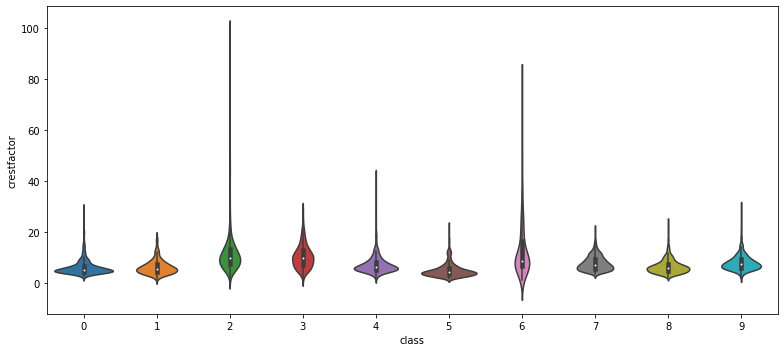

In [15]:
# Some preliminary visualization to understand the feature distributions

plt.figure(figsize=(11,5))
sns.violinplot(data = cv_features_df,
             x = 'class',
             y = 'crestfactor')
plt.tight_layout()
plt.show()

## Setup: Define KPIs

In this section, we define functions to calculate KPIs.

In [16]:
def reduce_confmat(matrix):
    """
    Takes the N-dimensional confusion matrix as input and returns 
    a tuple (true positive, false positive, false negative) for the whole set.
    
    confusion matrix C is such that C_ij is equal to the 
    number of observations known to be in group i 
    and predicted to be in group j.
    """
    
    tps = [] # True positives for each axis
    fps = [] # True 
    fns = []
    
    for i in range(len(matrix)):
        tps.append(matrix[i,i]) # Append true positives for a class
        fps.append( np.delete(matrix[:,i],i).sum() ) # take sum, dropping the diagonal element
        fns.append( np.delete(matrix[i,:],i).sum() ) # take sum, dropping the diagonal element
        
    res = (tps, fps, fns)
    return res

In [17]:
def TPR(data, prediction):
    """
    Returns True Positive Ratio given a prediction and data
    """
    confmat = confusion_matrix(data, prediction)
    
    (TP, FP, FN) = reduce_confmat(confmat)
    
    truepos = lambda a, b, c: a/(b+c)
    
    return [truepos(TP[i], TP[i], FN[i]) for i in range(len(TP))]
    

    

In [18]:
def recall(data, prediction):
    """
    Calculates recall of a prediction
    """
    
    confmat = confusion_matrix(data, prediction)

    (TP, FP, FN) = reduce_confmat(confmat)
    
    rec = lambda a, b, c: a/(b+c)
    
    return [rec(TP[i], TP[i], FN[i]) for i in range(len(TP))]
    

def precision(data, prediction):
    """
    Calculates precision of a prediction
    """
    
    confmat = confusion_matrix(data, prediction)

    (TP, FP, FN) = reduce_confmat(confmat)
    
    prec = lambda a, b, c: a/(b+c)
    
    return [prec(TP[i], TP[i], FP[i]) for i in range(len(TP))]
    

In [19]:
def Fmeasure(data, prediction):
    """
    Returns Fmeasure. 
    
    This is considered a balance of the precision and the recall.
    
    F = (2*P*R)/(P+R)
    
    where
    
    P = TP/(TP + FP) is the precision and
    R = TP/(TP + FN) is the recall.
    
    Reference: 
    Müller, Meinard. Fundamentals of music processing: Audio, analysis, algorithms, applications. 
    Vol. 5. Cham: Springer, 2015.
    Sec. 4.5 pp. 217
    """
    confmat = confusion_matrix(data, prediction)

    (TP, FP, FN) = reduce_confmat(confmat)
    
#     P = TP/(TP + FP)
#     R = TP/(TP + FN)
    
    workhorse = lambda a, b, c: a/(b+c)
    Fmeas = lambda x,y : (2*x*y)/(x+y)
    
    P = [workhorse(TP[i], TP[i], FP[i]) for i in range(len(TP))]
    R = [workhorse(TP[i], TP[i], FN[i]) for i in range(len(TP))]
    
    
    #F = (2*P*R)/(P + R)
    return [Fmeas(P[i],R[i]) for i in range(len(P))] #F
    

## Establishing a baseline: The Random Forest

In [196]:
len(cv_features_df.head().keys()[1:-1])

404

### First: Feature selection with a Random Forest

In [22]:
if len(classify_keys) == 1:
    X_train = cv_features_df[full_classify_keys[0]].values.reshape(-1,1)
else:
    #X_train = cv_features_df.iloc[:,1:-1].values # same as using all keys, but less flexible
    X_train = cv_features_df[full_classify_keys].values
    
y_train = cv_features_df['class'].values

#X_test = validation_features_df.iloc[:,1:-1].values # Same as using all keys, but less flexible
X_test = validation_features_df[full_classify_keys].values
y_test = validation_features_df['class']

In [24]:
cv_features_df.head()

,class,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,...,range_high.f0_stats.f0_min,range_high.f0_signal,range_low.f0_stats.f0_mean,range_low.f0_stats.f0_median,range_low.f0_stats.f0_std,range_low.f0_stats.f0_iqr,range_low.f0_stats.f0_max,range_low.f0_stats.f0_min,power_ratio,hits_ratio
0,2,0.772997,0.712426,0.713102,0.745311,0.702959,0.745459,0.761651,0.793981,0.699655,...,544.841599,0.571429,NaN,NaN,NaN,NaN,NaN,NaN,0.889862,-1.567587
1,2,-0.404583,-0.431886,-0.543574,-0.629743,-0.779261,-0.862212,-0.947772,-0.862379,-0.590296,...,2080.949703,0.109827,NaN,NaN,NaN,NaN,NaN,NaN,-2.498050,-1.411869
2,9,0.599927,0.751218,0.927003,1.128319,1.288145,1.548013,1.791355,1.793211,1.843819,...,1077.167118,0.294798,1128.712229,1115.153334,36.960305,57.225801,1195.191751,1077.167118,0.354830,-1.901937
3,5,1.692123,2.073951,2.616619,2.551652,2.474416,2.399168,2.272425,2.188971,2.090052,...,523.251131,0.260116,NaN,NaN,NaN,NaN,NaN,NaN,-4.733537,-0.916112
4,7,1.508975,1.808151,1.939758,1.977737,1.921932,1.896263,1.794886,1.753717,1.676690,...,2057.047957,0.156069,66.850514,65.785287,1.875716,1.731598,70.915367,65.406391,-0.669574,-0.083523


In [25]:
# Once again, check for clean inputs.

set(np.where(np.isnan(X_train) == 1)[0])

set()

In [26]:
#forest = make_pipeline(RobustScaler(), RandomForestClassifier(max_depth=len(set(features_df['class'])), n_estimators=1000,n_jobs=4))
forest = RandomForestClassifier(max_depth=len(set(features_df['class'])), n_estimators=1000,n_jobs=4)

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=4)

In [28]:
pred = forest.predict(X_test)

### Establish baseline KPIs

In [29]:
# Look at classes 

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.36      0.34      0.35       100
           1       0.60      0.21      0.31        43
           2       0.35      0.66      0.46       100
           3       0.80      0.70      0.74       100
           4       0.40      0.60      0.48       100
           5       0.30      0.22      0.26       107
           6       0.89      0.92      0.90        36
           7       0.30      0.28      0.29       120
           8       0.39      0.19      0.26       119
           9       0.40      0.42      0.41       100

    accuracy                           0.43       925
   macro avg       0.48      0.45      0.45       925
weighted avg       0.44      0.43      0.41       925



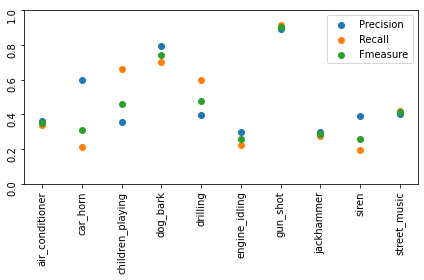

In [30]:
# Plot class KPIs in a more intuitive way for decision making

fig = plt.figure()
ax0 = fig.add_subplot(111)

ax0.scatter(classlabels,precision(y_test, pred),label='Precision')
ax0.scatter(classlabels,recall(y_test, pred),label='Recall')
ax0.scatter(classlabels,Fmeasure(y_test, pred),label='Fmeasure')

ax0.tick_params(rotation=90)
ax0.legend()
ax0.set_ylim(0,1)

plt.tight_layout()
plt.show()

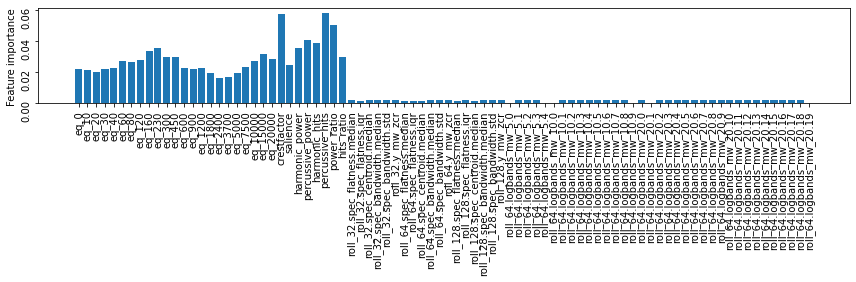

In [33]:
# Investigate feature importance in the Random Forest

fig = plt.figure(figsize=(12,4))
ax0 = fig.add_subplot(111)

ax0.bar(full_classify_keys,forest.feature_importances_)

ax0.tick_params(rotation=90)
ax0.set_ylabel('Feature importance')

plt.tight_layout()
plt.show()

Now that we can see which features are important, we can reduce to only using this list and training another classifier.

In [34]:
classify_keys = [
 'eq_0',
 'eq_10',
 'eq_20',
 'eq_30',
 'eq_40',
 'eq_60',
 'eq_80',
 'eq_120',
 'eq_160',
 'eq_230',
 'eq_300',
 'eq_450',
 'eq_600',
 'eq_900',
 'eq_1200',
 'eq_1800',
 'eq_2400',
 'eq_3700',
 'eq_5000',
 'eq_7500',
 'eq_10000',
 'eq_15000',
 'eq_20000',
 'crestfactor',
 'salience',
 'harmonic_power',
 'percussive_power',
 'harmonic_hits',
 'percussive_hits',
 'power_ratio',
 'hits_ratio' ]

In [35]:
if len(classify_keys) == 1:
    X_train = cv_features_df[classify_keys[0]].values.reshape(-1,1)
else:
    #X_train = cv_features_df.iloc[:,1:-1].values # same as using all keys, but less flexible
    X_train = cv_features_df[classify_keys].values
    
y_train = cv_features_df['class'].values

#X_test = validation_features_df.iloc[:,1:-1].values # Same as using all keys, but less flexible
X_test = validation_features_df[classify_keys].values
y_test = validation_features_df['class']

In [36]:
forest = RandomForestClassifier(max_depth=len(set(features_df['class'])), n_estimators=1000,n_jobs=4)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

#### Re-establish baseline KPIs

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.33      0.30      0.32       100
           1       0.48      0.28      0.35        43
           2       0.37      0.66      0.47       100
           3       0.78      0.67      0.72       100
           4       0.39      0.56      0.46       100
           5       0.32      0.23      0.27       107
           6       0.94      0.94      0.94        36
           7       0.30      0.28      0.29       120
           8       0.47      0.29      0.36       119
           9       0.43      0.45      0.44       100

    accuracy                           0.44       925
   macro avg       0.48      0.47      0.46       925
weighted avg       0.45      0.44      0.43       925



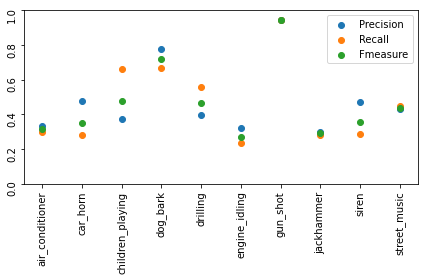

In [38]:
# Plot class KPIs in a more intuitive way for decision making

fig = plt.figure()
ax0 = fig.add_subplot(111)

ax0.scatter(classlabels,precision(y_test, pred),label='Precision')
ax0.scatter(classlabels,recall(y_test, pred),label='Recall')
ax0.scatter(classlabels,Fmeasure(y_test, pred),label='Fmeasure')

ax0.tick_params(rotation=90)
ax0.legend()
ax0.set_ylim(0,1)

plt.tight_layout()
plt.show()

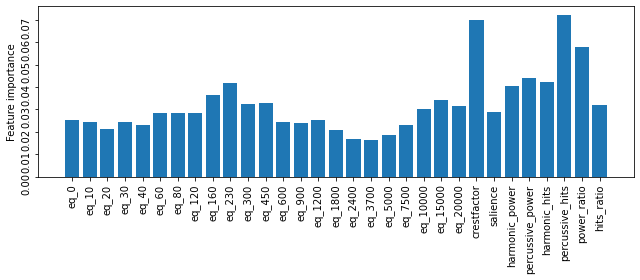

In [41]:
# Investigate feature importance in the Random Forest

fig = plt.figure(figsize=(9,4))
ax0 = fig.add_subplot(111)

ax0.bar(classify_keys,forest.feature_importances_)

ax0.tick_params(rotation=90)
ax0.set_ylabel('Feature importance')

plt.tight_layout()
plt.show()

<Figure size 648x648 with 0 Axes>

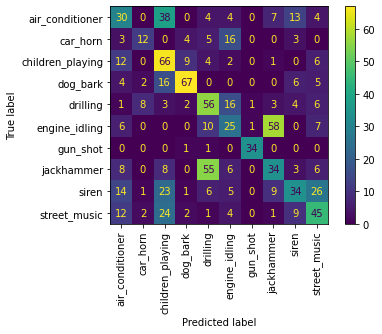

In [42]:
# Visualize the Confusion Matrix

plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()

The confusion matrix is interpretable; the air conditioner is a noisy quantity with a lot of environmental background, so naturally gets confused with other classes. The jackhammer is often confused for drilling while an idling engine is confused for a jackhammer. Since drills and jackhammers both have engines and are on noisy construction sites with vehicles, we see commonalities that make intuitive sense.

## Trying another model: A simple NN

We now investigate a multi-layer neural network classifier to investigate performance.

In [44]:
mlp = make_pipeline(MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000, early_stopping=True))
mlp.fit(X_train, y_train)

Pipeline(steps=[('mlpclassifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(150, 150, 150, 150, 150),
                               max_iter=100000))])

In [45]:
pred_mlp = mlp.predict(X_test)

In [46]:
# Get report with main KPIs
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

           0       0.23      0.36      0.28       100
           1       0.21      0.21      0.21        43
           2       0.52      0.46      0.49       100
           3       0.53      0.79      0.64       100
           4       0.49      0.51      0.50       100
           5       0.30      0.22      0.26       107
           6       0.92      0.92      0.92        36
           7       0.34      0.23      0.28       120
           8       0.45      0.28      0.34       119
           9       0.41      0.48      0.44       100

    accuracy                           0.42       925
   macro avg       0.44      0.45      0.44       925
weighted avg       0.42      0.42      0.41       925



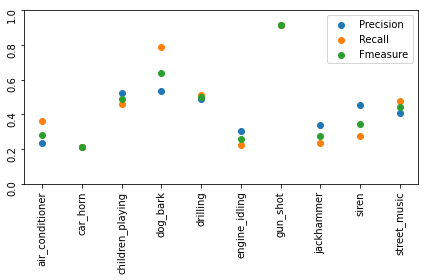

In [47]:
# Visualize KPIs per class more intuitively

fig = plt.figure()
ax0 = fig.add_subplot(111)

ax0.scatter(classlabels,precision(y_test, pred_mlp),label='Precision')
ax0.scatter(classlabels,recall(y_test, pred_mlp),label='Recall')
ax0.scatter(classlabels,Fmeasure(y_test, pred_mlp),label='Fmeasure')

ax0.tick_params(rotation=90)
ax0.legend()
ax0.set_ylim(0,1)

plt.tight_layout()
plt.show()

We once again see very good KPIs for the gunshot. This suggests that in the main category it is important to get right for our stakeholders, we do by-far-and-away the best. This suggests that features such as crestfactor successfully encode relevant information.

<Figure size 648x648 with 0 Axes>

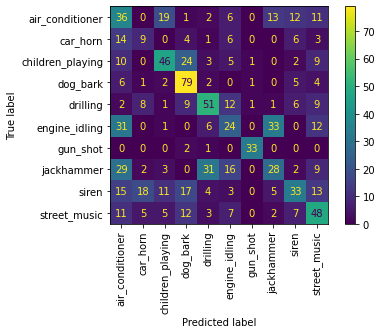

In [48]:
# Visualize the Confusion Matrix

plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_mlp),display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()

The interpretation of the confusion matrix is similar to that of the Random Forest. gunshots now are confused more for drilling and dog barks, which can involve very sudden sounds. However, the NN classifier still has outstanding performance. The important thing is that *true* gunshots are successfully identified. A human can review recordings and screen for false positives, but false negatives are far more harmful.

## NN Classification using Keras

Is the NN classifier performance a specific feature of SciKit-Learn or is it a feature that can be replicated with more sophisticated NNs?

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from tensorflow.keras.metrics import CategoricalAccuracy, Recall, Precision 
# Additional metrics: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [126]:
# Construct the model
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=len(classify_keys)))
model.add(Dense(350, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=[Precision(),Recall(),CategoricalAccuracy()])

In [128]:
n_epochs = 50
history = model.fit(X_train, to_categorical(y_train), epochs=n_epochs, verbose = 1,
              validation_data = (X_test, to_categorical(y_test)))

Epoch 1/50
244/244 [==============================] - 2s 4ms/step - loss: 2.8454 - precision_1: 0.4347 - recall_3: 0.1346 - categorical_accuracy: 0.2886 - val_loss: 2.3022 - val_precision_1: 0.5758 - val_recall_3: 0.1232 - val_categorical_accuracy: 0.2886
Epoch 2/50
244/244 [==============================] - 1s 4ms/step - loss: 1.7468 - precision_1: 0.6346 - recall_3: 0.1848 - categorical_accuracy: 0.3690 - val_loss: 1.8789 - val_precision_1: 0.6044 - val_recall_3: 0.1189 - val_categorical_accuracy: 0.3081
Epoch 3/50
244/244 [==============================] - 1s 4ms/step - loss: 1.5804 - precision_1: 0.6704 - recall_3: 0.2298 - categorical_accuracy: 0.4336 - val_loss: 1.8114 - val_precision_1: 0.5473 - val_recall_3: 0.2000 - val_categorical_accuracy: 0.3676
Epoch 4/50
244/244 [==============================] - 1s 4ms/step - loss: 1.4444 - precision_1: 0.6941 - recall_3: 0.2959 - categorical_accuracy: 0.4839 - val_loss: 1.6903 - val_precision_1: 0.5564 - val_recall_3: 0.2400 - val_categ

Epoch 33/50
244/244 [==============================] - 1s 4ms/step - loss: 0.8646 - precision_1: 0.8224 - recall_3: 0.6164 - categorical_accuracy: 0.7127 - val_loss: 4.2653 - val_precision_1: 0.4932 - val_recall_3: 0.3546 - val_categorical_accuracy: 0.4141
Epoch 34/50
244/244 [==============================] - 1s 4ms/step - loss: 0.8557 - precision_1: 0.8237 - recall_3: 0.6175 - categorical_accuracy: 0.7119 - val_loss: 4.7994 - val_precision_1: 0.4992 - val_recall_3: 0.3351 - val_categorical_accuracy: 0.4022
Epoch 35/50
244/244 [==============================] - 1s 4ms/step - loss: 0.8542 - precision_1: 0.8293 - recall_3: 0.6206 - categorical_accuracy: 0.7149 - val_loss: 4.1188 - val_precision_1: 0.4799 - val_recall_3: 0.3351 - val_categorical_accuracy: 0.4032
Epoch 36/50
244/244 [==============================] - 1s 4ms/step - loss: 0.8230 - precision_1: 0.8302 - recall_3: 0.6298 - categorical_accuracy: 0.7185 - val_loss: 4.6901 - val_precision_1: 0.4761 - val_recall_3: 0.3124 - val_c

In [127]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, to_categorical(y_train), verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, to_categorical(y_test), verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

244/244 [==============================] - 0s 1ms/step
Accuracy on training data: 0.06840550899505615% 
 Error on training data: 0.9315944910049438
29/29 [==============================] - 0s 2ms/step
Accuracy on test data: 0.060648802667856216% 
 Error on test data: 0.9393511973321438


In [94]:
# Format the Keras result so as to return the confusion matrix
keras_confmat = confusion_matrix(to_categorical(y_test).argmax(axis=1), pred_test.argmax(axis=1))

<Figure size 648x648 with 0 Axes>

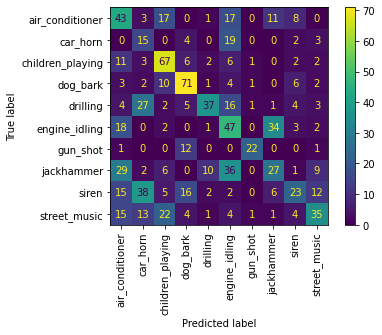

In [95]:
plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(keras_confmat,display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()

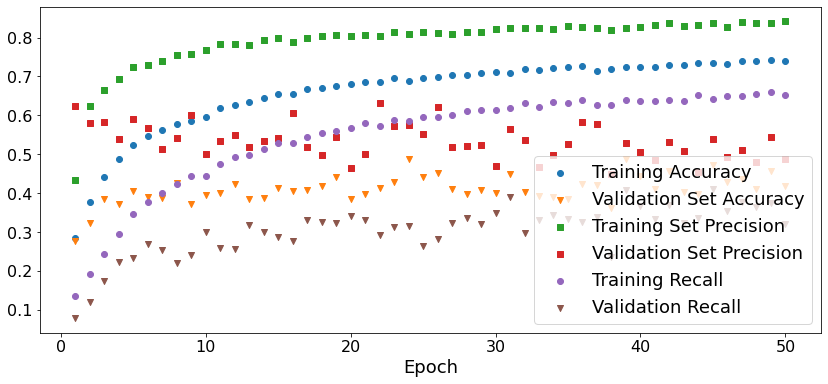

In [97]:
history_dict = history.history

plt.figure(figsize = (14,6))

plt.scatter(range(1,n_epochs+1), history_dict['categorical_accuracy'], label = "Training Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict['val_categorical_accuracy'], marker='v', label = "Validation Set Accuracy")

plt.scatter(range(1,n_epochs+1), history_dict['precision'], marker='s', label = "Training Set Precision")
plt.scatter(range(1,n_epochs+1), history_dict['val_precision'], marker='s', label = "Validation Set Precision")

plt.scatter(range(1,n_epochs+1), history_dict['recall_2'], label = "Training Recall")
plt.scatter(range(1,n_epochs+1), history_dict['val_recall_2'], marker='v', label = "Validation Recall")

plt.xlabel("Epoch", fontsize=18)
#plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

The metrics on the training and test set, as well as the confusion matrix, reveal that we get comparable performance with this Keras network, but that NNs may be struggling with noisy data as training accuracy and recall improve with no discernable impact on the validation set after the first few epochs. Additionally, this NN has perfect gunshot recall, but much poorer precision than the sklearn NN classifier. Precision also is fairly statitic over the training regime and is also low for gunshots. As precision is more important than recall to our stakeholders, this suggests that Keras NNs are not worth pursuing at this stage.

In [98]:
# Streamline the plotting process 

def make_class_scatter_plot(p,ytest,label):
    fig = plt.figure()
    ax0 = fig.add_subplot(111)

    ax0.scatter(classlabels,precision(ytest,p),label='Precision')
    ax0.scatter(classlabels,recall(ytest,p),label='Recall')
    ax0.scatter(classlabels,Fmeasure(ytest,p),label='Fmeasure')

    ax0.tick_params(rotation=90)
    ax0.legend()
    ax0.set_ylim(0,1)
    plt.title(f'Classifier: {label}')
    plt.tight_layout()
    plt.show()
    
def make_family_scatter_plot(p,ytest,label):
    fig = plt.figure()
    ax0 = fig.add_subplot(111)

    ax0.scatter(familylabels,precision(ytest,p),label='Precision')
    ax0.scatter(familylabels,recall(ytest,p),label='Recall')
    ax0.scatter(familylabels,Fmeasure(ytest,p),label='Fmeasure')

    ax0.tick_params(rotation=90)
    ax0.legend()
    ax0.set_ylim(0,1)
    plt.title(f'Classifier: {label}')
    plt.tight_layout()
    plt.show()

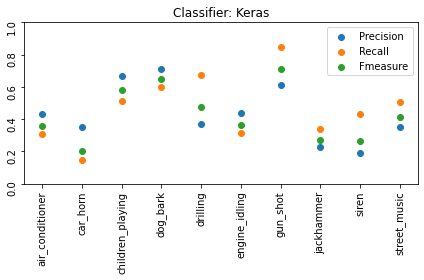

In [99]:
make_class_scatter_plot(y_test,pred_test.argmax(axis=1),'Keras')

In [100]:
print(f'Gunshot recall: {100*recall(pred_test.argmax(axis=1),y_test)[6]} percent')
print(f'Gunshot precision: {100*precision(pred_test.argmax(axis=1),y_test)[6]} percent')

Gunshot recall: 84.61538461538461 percent
Gunshot precision: 61.111111111111114 percent


<Figure size 648x648 with 0 Axes>

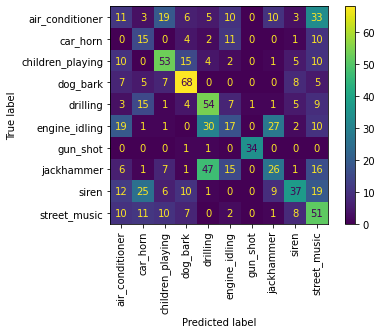

In [101]:
plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_mlp),display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()

## Looping through specified models

Now that we have explored how classifiers behave and looked at feature importance, we loop through the collection of classifiers defined at the beginning of this notebook. These range from the simple to the more complex and will allow us to investigate if more complex classifiers are justified by their performance.

/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


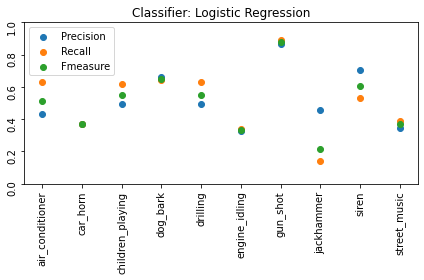

Logistic Regression Classifier accuracy score: 0.4918918918918919
Logistic Regression Classifier gunshot recall score: 0.8888888888888888
Logistic Regression Classifier gunshot precision score: 0.8648648648648649
Logistic Regression Classifier Precision: 0.5156309289906131
Logistic Regression Classifier Recall: 0.5178508941648092
Logistic Regression Classifier Fmeasure: 0.5035018854909094



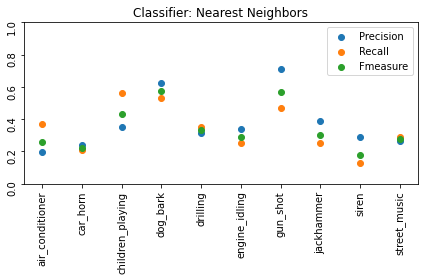

Nearest Neighbors Classifier accuracy score: 0.33297297297297296
Nearest Neighbors Classifier gunshot recall score: 0.4722222222222222
Nearest Neighbors Classifier gunshot precision score: 0.7083333333333334
Nearest Neighbors Classifier Precision: 0.37096403349429824
Nearest Neighbors Classifier Recall: 0.3409911416569816
Nearest Neighbors Classifier Fmeasure: 0.3426053355929254



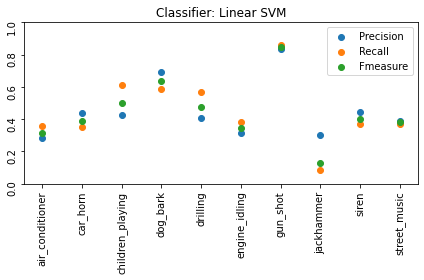

Linear SVM Classifier accuracy score: 0.4227027027027027
Linear SVM Classifier gunshot recall score: 0.8611111111111112
Linear SVM Classifier gunshot precision score: 0.8378378378378378
Linear SVM Classifier Precision: 0.4538023770123095
Linear SVM Classifier Recall: 0.4546207122999893
Linear SVM Classifier Fmeasure: 0.4428024056426551



<ipython-input-26-0a88006117b9>:32: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-27-0037ae515cef>:31: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-27-0037ae515cef>:32: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)


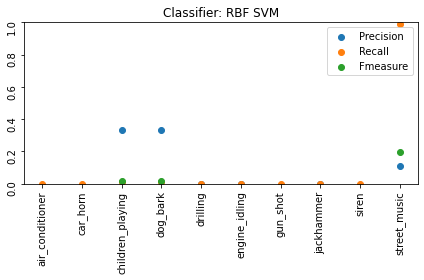

<ipython-input-26-0a88006117b9>:32: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-26-0a88006117b9>:32: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-27-0037ae515cef>:31: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-27-0037ae515cef>:32: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)


RBF SVM Classifier accuracy score: 0.10918918918918918
RBF SVM Classifier gunshot recall score: 0.0
RBF SVM Classifier gunshot precision score: nan
RBF SVM Classifier Precision: nan
RBF SVM Classifier Recall: 0.101
RBF SVM Classifier Fmeasure: nan



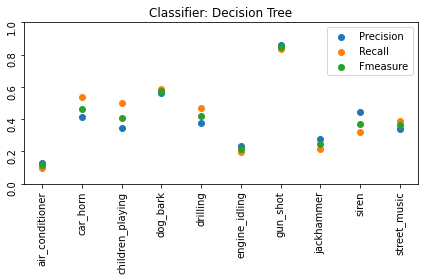

Decision Tree Classifier accuracy score: 0.3708108108108108
Decision Tree Classifier gunshot recall score: 0.8333333333333334
Decision Tree Classifier gunshot precision score: 0.8571428571428571
Decision Tree Classifier Precision: 0.39823574667839123
Decision Tree Classifier Recall: 0.415047313426566
Decision Tree Classifier Fmeasure: 0.4019222505349799



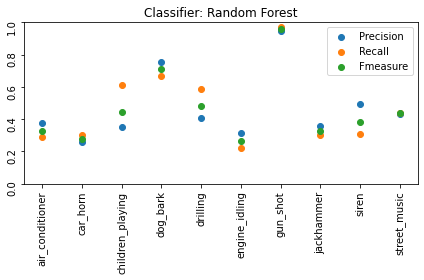

Random Forest Classifier accuracy score: 0.43783783783783786
Random Forest Classifier gunshot recall score: 0.9722222222222222
Random Forest Classifier gunshot precision score: 0.9459459459459459
Random Forest Classifier Precision: 0.4691807018728378
Random Forest Classifier Recall: 0.4709771238786031
Random Forest Classifier Fmeasure: 0.460884522732009



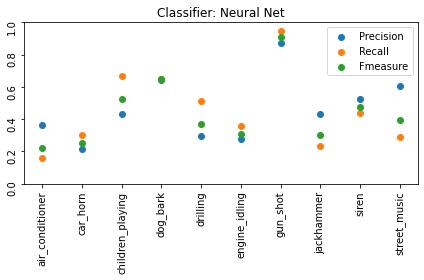

Neural Net Classifier accuracy score: 0.42486486486486486
Neural Net Classifier gunshot recall score: 0.9444444444444444
Neural Net Classifier gunshot precision score: 0.8717948717948718
Neural Net Classifier Precision: 0.46502517152572836
Neural Net Classifier Recall: 0.4552218336004981
Neural Net Classifier Fmeasure: 0.4403218228176479



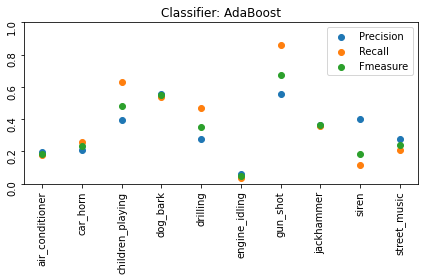

AdaBoost Classifier accuracy score: 0.3308108108108108
AdaBoost Classifier gunshot recall score: 0.8611111111111112
AdaBoost Classifier gunshot precision score: 0.5535714285714286
AdaBoost Classifier Precision: 0.3288765453814113
AdaBoost Classifier Recall: 0.36602886343264396
AdaBoost Classifier Fmeasure: 0.33026620620536584



<ipython-input-27-0037ae515cef>:32: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)


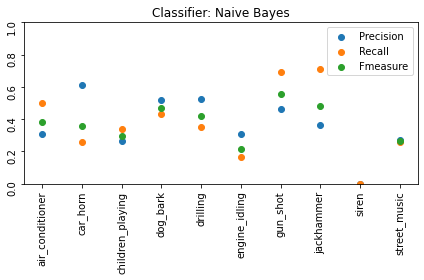

Naive Bayes Classifier accuracy score: 0.3535135135135135
Naive Bayes Classifier gunshot recall score: 0.6944444444444444
Naive Bayes Classifier gunshot precision score: 0.46296296296296297
Naive Bayes Classifier Precision: 0.3629205278630735
Naive Bayes Classifier Recall: 0.370681603033157
Naive Bayes Classifier Fmeasure: nan



<ipython-input-27-0037ae515cef>:32: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)


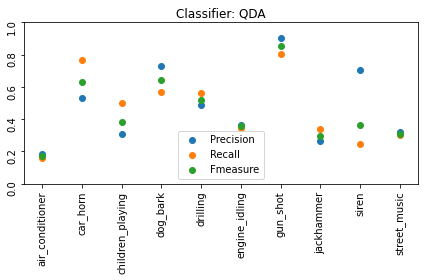

QDA Classifier accuracy score: 0.40864864864864864
QDA Classifier gunshot recall score: 0.8055555555555556
QDA Classifier gunshot precision score: 0.90625
QDA Classifier Precision: 0.4810158106900146
QDA Classifier Recall: 0.4594155954202299
QDA Classifier Fmeasure: 0.45238064484737117



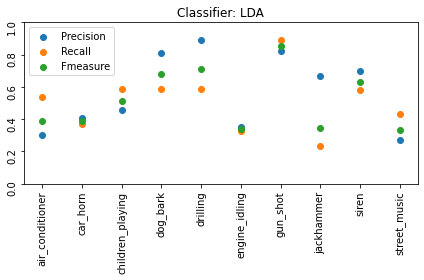

LDA Classifier accuracy score: 0.4908108108108108
LDA Classifier gunshot recall score: 0.8888888888888888
LDA Classifier gunshot precision score: 0.8205128205128205
LDA Classifier Precision: 0.5676049294029306
LDA Classifier Recall: 0.5141249981989462
LDA Classifier Fmeasure: 0.5187914602808097



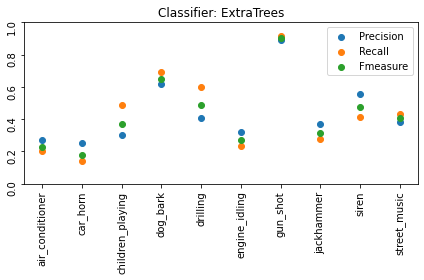

ExtraTrees Classifier accuracy score: 0.4183783783783784
ExtraTrees Classifier gunshot recall score: 0.9166666666666666
ExtraTrees Classifier gunshot precision score: 0.8918918918918919
ExtraTrees Classifier Precision: 0.43672234344580974
ExtraTrees Classifier Recall: 0.4386611116083034
ExtraTrees Classifier Fmeasure: 0.42862346740807994



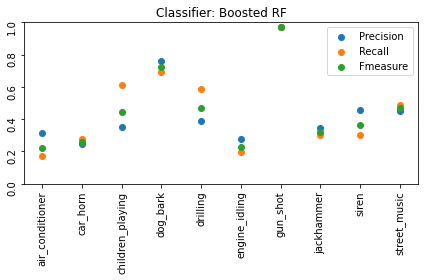

Boosted RF Classifier accuracy score: 0.42702702702702705
Boosted RF Classifier gunshot recall score: 0.9722222222222222
Boosted RF Classifier gunshot precision score: 0.9722222222222222
Boosted RF Classifier Precision: 0.45528092448306545
Boosted RF Classifier Recall: 0.4600074680310435
Boosted RF Classifier Fmeasure: 0.44717177880546277



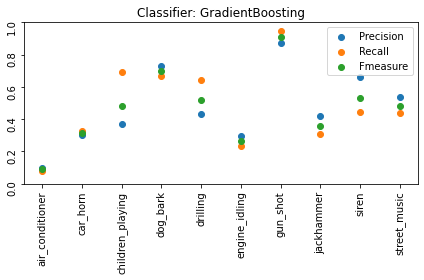

GradientBoosting Classifier accuracy score: 0.4486486486486487
GradientBoosting Classifier gunshot recall score: 0.9444444444444444
GradientBoosting Classifier gunshot precision score: 0.8717948717948718
GradientBoosting Classifier Precision: 0.4724962700742214
GradientBoosting Classifier Recall: 0.4777382184200204
GradientBoosting Classifier Fmeasure: 0.46404546141514735



In [103]:
for i, classifier in enumerate(classifiers):

    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    make_class_scatter_plot(pred,y_test,names[i])
    print(f'{names[i]} Classifier accuracy score: {accuracy_score(y_test, pred)}')
    print(f'{names[i]} Classifier gunshot recall score: {recall(y_test, pred)[6]}')
    print(f'{names[i]} Classifier gunshot precision score: {precision(y_test, pred)[6]}')
    print(f'{names[i]} Classifier Precision: {np.mean(precision(y_test, pred))}')
    print(f'{names[i]} Classifier Recall: {np.mean(recall(y_test, pred))}')
    print(f'{names[i]} Classifier Fmeasure: {np.mean(Fmeasure(y_test, pred))}')
    print("")

For this training fold, the performances are summarized below. Bold denotes top 4 performance in two 2-way ties.

| Classifier   | Gunshot Recall | Cross-class Fmeasure |
|--------------|----------------|----------------------|
| Log. Reg.    | 0.889          | 0.504                |
| kNN          | 0.472          | 0.343                |
| Linear SVM   | 0.861          | 0.443                |
| Decision Tree| 0.833          | 0.402                |
| Random Forest| **0.972**      | **0.461**            |
| NN           | **0.944**      | **0.440**            |
| AdaBoost     | 0.861          | 0.330                |
| Naive Bayes  | 0.694          | nan                  |
| QDA          | 0.806          | 0.452                |
| LDA          | 0.889          | 0.519                |
| ExtraTrees   | 0.917          | 0.429                |
| Boosted RF   | **0.972**      | **0.447**            |
| GradientBoosting | **0.944**  | **0.464**            |

The RandomForest (boosted or not) performs best on this cross-validation fold and the boosting appears to lower the Fmeasure. As a result, the RandomForest is the top candidate on this fold.

The Neutral Network is tied with GradientBoosting on this fold and GradientBoosting has a higher F-measure. This begins to suggest the top performing classifiers, but it's necessary to consider all folds before coming to a final conclusion.

Below, we interrogate the results of the GradientBoosting classifier with more detailed metrics.

In [129]:
accuracy_score(pred,y_test)

0.43027027027027026

<Figure size 648x648 with 0 Axes>

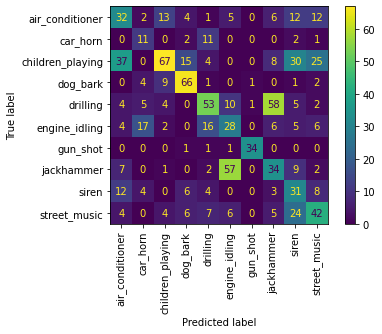

In [130]:
plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(confusion_matrix(pred,y_test),display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()

## Trying out a Voting Classifier to beat the others

Voting classifiers are a form of ensemble learning where voters combine to create a more accurate prediction than any individual classifier.

In [131]:
voter_list = [(names[i], classifiers[i]) for i in range(len(names))]

In [132]:
voting = VotingClassifier(voter_list,
                         voting='hard',
                         n_jobs=4)

In [133]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=5000)),
                             ('Nearest Neighbors',
                              KNeighborsClassifier(n_jobs=4)),
                             ('Linear SVM', SVC(C=0.025, kernel='linear')),
                             ('RBF SVM', SVC(C=1, gamma=2)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=15)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=500,
                                                     n_jobs=4)),
                             ('Neura...
                             ('AdaBoost', AdaBoostClassifier()),
                             ('Naive Bayes', GaussianNB()),
                             ('QDA', QuadraticDiscriminantAnalysis()),
                            

In [134]:
vpred = voting.predict(X_test)


In [235]:
import gc
#del(clf)

gc.collect()

28

In [135]:
accuracy_score(y_test,vpred)

0.4854054054054054

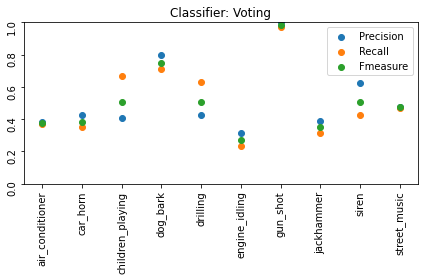

In [136]:
make_class_scatter_plot(vpred,y_test,'Voting')

In [141]:
print(classification_report(y_test,vpred))

              precision    recall  f1-score   support

           0       0.39      0.37      0.38       100
           1       0.43      0.35      0.38        43
           2       0.41      0.67      0.51       100
           3       0.80      0.71      0.75       100
           4       0.43      0.63      0.51       100
           5       0.32      0.23      0.27       107
           6       1.00      0.97      0.99        36
           7       0.39      0.32      0.35       120
           8       0.62      0.43      0.51       119
           9       0.47      0.47      0.47       100

    accuracy                           0.49       925
   macro avg       0.52      0.51      0.51       925
weighted avg       0.50      0.49      0.48       925



<Figure size 648x648 with 0 Axes>

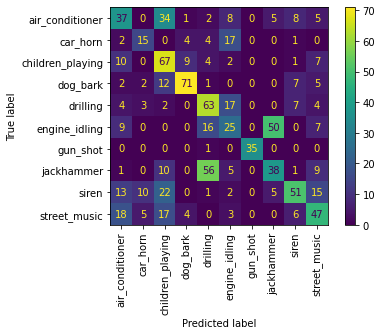

In [143]:
plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,vpred),display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()

In [145]:
recall(y_test,vpred)[6]

0.9722222222222222

In [144]:
np.mean(Fmeasure(y_test,vpred))

0.5112310476133312

While the gunshot recall has not improved, Fmeasure has, suggesting that the Voting Classifier achieves the most success. However, this is at significant cost in complexity and interpretability. It is up to a more involved comparison to determine if this is worthwhile.

### What about a stacking classifier?

In [147]:
clf = StackingClassifier(estimators=[('LDA', make_pipeline(StandardScaler(),LinearDiscriminantAnalysis())),
    ('rf', RandomForestClassifier(max_depth=15,n_estimators=1000, random_state=42))
], final_estimator=LogisticRegression(max_iter=5000))

In [148]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('LDA',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('lineardiscriminantanalysis',
                                                 LinearDiscriminantAnalysis())])),
                               ('rf',
                                RandomForestClassifier(max_depth=15,
                                                       n_estimators=500,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(max_iter=5000))

In [149]:
stackpred = clf.predict(X_test)

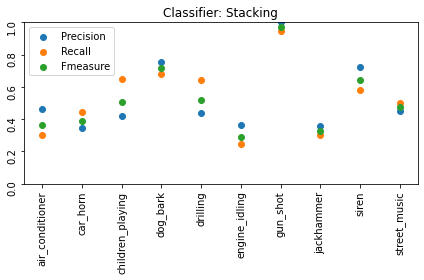

In [150]:
make_class_scatter_plot(stackpred,y_test,'Stacking')

In [151]:
print(classification_report(y_test,stackpred))

              precision    recall  f1-score   support

           0       0.46      0.30      0.36       100
           1       0.35      0.44      0.39        43
           2       0.42      0.65      0.51       100
           3       0.76      0.68      0.72       100
           4       0.44      0.64      0.52       100
           5       0.36      0.24      0.29       107
           6       1.00      0.94      0.97        36
           7       0.36      0.30      0.33       120
           8       0.73      0.58      0.64       119
           9       0.45      0.50      0.47       100

    accuracy                           0.50       925
   macro avg       0.53      0.53      0.52       925
weighted avg       0.51      0.50      0.49       925



This is also quite successful but without all the complexity of the voting classifier. This is potentially worth including in the list of classifiers.

## Considering all folds in validation

In [153]:
len(names)

14

In [157]:
accuracies = np.zeros((10, len(names)))
Fs = np.zeros((10,len(names)))
recalls = np.zeros((10,len(names)))
precisions = np.zeros((10,len(names)))

gunshot_recalls = np.zeros((10,len(names)))
gunshot_precisions = np.zeros((10,len(names)))
gunshot_Fs = np.zeros((10,len(names)))

In [159]:
for dropfold in range(1,11):
    
    print(f'Fold {dropfold}')
    cv_features_df = features_df.drop(features_df[features_df['fold']==dropfold].index)
    validation_features_df = features_df.drop(features_df[features_df['fold']!=dropfold].index)

    if len(classify_keys) == 1:
        X_train = cv_features_df[classify_keys[0]].values.reshape(-1,1)
    else:
        X_train = cv_features_df[classify_keys].values

    y_train = cv_features_df['class'].values

    X_test = validation_features_df[classify_keys].values
    y_test = validation_features_df['class']

    for i, classifier in enumerate(classifiers):
        print(names[i])
        classifier.fit(X_train, y_train)
        pred = classifier.predict(X_test)
        
        accuracies[dfi][i] = accuracy_score(y_test, pred)
        Fs[dfi][i] = np.mean(Fmeasure(y_test, pred))
        recalls[dfi][i] = np.mean(recall(y_test, pred))
        precisions[dfi][i] = np.mean(precision(y_test, pred))
        
        gunshot_Fs[dfi][i] = Fmeasure(y_test, pred)[6]
        gunshot_recalls[dfi][i] = recall(y_test, pred)[6]
        gunshot_precisions[dfi][i] = precision(y_test, pred)[6]

Fold 1
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting
Fold 2
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting
Fold 3
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees


<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)


Boosted RF
GradientBoosting
Fold 4
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting
Fold 5
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees


<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)


Boosted RF
GradientBoosting
Fold 6
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting
Fold 7
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting
Fold 8
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting
Fold 9
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting
Fold 10
Logistic Regression


/home/mheffernan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nearest Neighbors
Linear SVM
RBF SVM


<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:26: RuntimeWarning: invalid value encountered in long_scalars
  workhorse = lambda a, b, c: a/(b+c)
<ipython-input-106-8cd0e499882c>:27: RuntimeWarning: invalid value encountered in double_scalars
  Fmeas = lambda x,y : (2*x*y)/(x+y)
<ipython-input-105-7552669b698b>:24: RuntimeWarning: invalid value encountered in long_scalars
  prec = lambda a, b, c: a/(b+c)


Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA
LDA
ExtraTrees
Boosted RF
GradientBoosting


In [215]:
accuracies_final = np.mean(accuracies,axis=0)
Fs_final = np.mean(Fs,axis=0)
recalls_final = np.mean(recalls,axis=0)
precisions_final = np.mean(precisions,axis=0)

Fs_finalerr = np.std(Fs,axis=0)/np.sqrt(Fs.shape[1])

gunshot_Fs_final = np.mean(gunshot_Fs,axis=0)
gunshot_recalls_final = np.mean(gunshot_recalls,axis=0)
gunshot_precisions_final = np.mean(gunshot_precisions,axis=0)

gunshot_Fs_finalerr = np.std(gunshot_Fs,axis=0)/np.sqrt(gunshot_precisions.shape[1])
gunshot_recalls_finalerr = np.std(gunshot_recalls,axis=0)/np.sqrt(gunshot_precisions.shape[1])
gunshot_precisions_finalerr = np.std(gunshot_precisions,axis=0)/np.sqrt(gunshot_precisions.shape[1])

In [161]:
for i,name in enumerate(names):
    print(f'{name} overall accuracy: {np.round(accuracies_final[i],4)}')

Logistic Regression overall accuracy: 0.5427
Nearest Neighbors overall accuracy: 0.3615
Linear SVM overall accuracy: 0.5203
RBF SVM overall accuracy: 0.1073
Decision Tree overall accuracy: 0.4117
Random Forest overall accuracy: 0.5476
Neural Net overall accuracy: 0.5281
AdaBoost overall accuracy: 0.3836
Naive Bayes overall accuracy: 0.3759
QDA overall accuracy: 0.5348
LDA overall accuracy: 0.532
ExtraTrees overall accuracy: 0.5132
Boosted RF overall accuracy: 0.5408
GradientBoosting overall accuracy: 0.5426


In [162]:
for i,name in enumerate(names):
    print(f'{name} overall Fmeasure: {np.round(Fs_final[i],4)}')

Logistic Regression overall Fmeasure: 0.5427
Nearest Neighbors overall Fmeasure: 0.3689
Linear SVM overall Fmeasure: 0.5194
RBF SVM overall Fmeasure: nan
Decision Tree overall Fmeasure: 0.4135
Random Forest overall Fmeasure: 0.5483
Neural Net overall Fmeasure: 0.5255
AdaBoost overall Fmeasure: 0.3741
Naive Bayes overall Fmeasure: nan
QDA overall Fmeasure: 0.5443
LDA overall Fmeasure: 0.5392
ExtraTrees overall Fmeasure: 0.5033
Boosted RF overall Fmeasure: 0.5422
GradientBoosting overall Fmeasure: 0.5396


In [163]:
for i,name in enumerate(names):
    print(f'{name} overall recall: {np.round(recalls_final[i],4)}')

Logistic Regression overall recall: 0.5476
Nearest Neighbors overall recall: 0.3673
Linear SVM overall recall: 0.5226
RBF SVM overall recall: 0.1044
Decision Tree overall recall: 0.4266
Random Forest overall recall: 0.5528
Neural Net overall recall: 0.5363
AdaBoost overall recall: 0.401
Naive Bayes overall recall: 0.3794
QDA overall recall: 0.5413
LDA overall recall: 0.54
ExtraTrees overall recall: 0.5094
Boosted RF overall recall: 0.5459
GradientBoosting overall recall: 0.5461


In [164]:
for i,name in enumerate(names):
    print(f'{name} overall precision: {np.round(precisions_final[i],4)}')

Logistic Regression overall precision: 0.5709
Nearest Neighbors overall precision: 0.3899
Linear SVM overall precision: 0.5593
RBF SVM overall precision: nan
Decision Tree overall precision: 0.4173
Random Forest overall precision: 0.5678
Neural Net overall precision: 0.5459
AdaBoost overall precision: 0.39
Naive Bayes overall precision: 0.4044
QDA overall precision: 0.5833
LDA overall precision: 0.5788
ExtraTrees overall precision: 0.538
Boosted RF overall precision: 0.5683
GradientBoosting overall precision: 0.5539


In [211]:
for i,name in enumerate(names):
    print(f'{name} gunshot precision: {np.round(gunshot_precisions_final[i],4)} +/- {np.round(gunshot_precisions_finalerr[i],4)} ')

Logistic Regression gunshot precision: 0.7877 +/- 0.0319 
Nearest Neighbors gunshot precision: 0.7533 +/- 0.0326 
Linear SVM gunshot precision: 0.7849 +/- 0.0313 
RBF SVM gunshot precision: nan +/- nan 
Decision Tree gunshot precision: 0.691 +/- 0.0395 
Random Forest gunshot precision: 0.8067 +/- 0.0286 
Neural Net gunshot precision: 0.7707 +/- 0.037 
AdaBoost gunshot precision: 0.4855 +/- 0.0204 
Naive Bayes gunshot precision: 0.4753 +/- 0.04 
QDA gunshot precision: 0.8918 +/- 0.0245 
LDA gunshot precision: 0.7074 +/- 0.0287 
ExtraTrees gunshot precision: 0.8239 +/- 0.0307 
Boosted RF gunshot precision: 0.8577 +/- 0.0238 
GradientBoosting gunshot precision: 0.7926 +/- 0.0355 


In [212]:
for i,name in enumerate(names):
    print(f'{name} gunshot recall: {np.round(gunshot_recalls_final[i],4)} +/- {np.round(gunshot_recalls_finalerr[i],4)} ')

Logistic Regression gunshot recall: 0.7875 +/- 0.0303 
Nearest Neighbors gunshot recall: 0.5646 +/- 0.0458 
Linear SVM gunshot recall: 0.8227 +/- 0.0343 
RBF SVM gunshot recall: 0.0041 +/- 0.0022 
Decision Tree gunshot recall: 0.7311 +/- 0.0412 
Random Forest gunshot recall: 0.8367 +/- 0.0425 
Neural Net gunshot recall: 0.8473 +/- 0.0326 
AdaBoost gunshot recall: 0.7639 +/- 0.0278 
Naive Bayes gunshot recall: 0.6359 +/- 0.0616 
QDA gunshot recall: 0.6783 +/- 0.0405 
LDA gunshot recall: 0.7823 +/- 0.0377 
ExtraTrees gunshot recall: 0.7592 +/- 0.0595 
Boosted RF gunshot recall: 0.8244 +/- 0.0447 
GradientBoosting gunshot recall: 0.8065 +/- 0.0511 


In [213]:
for i,name in enumerate(names):
    print(f'{name} gunshot Fmeasure: {np.round(gunshot_Fs_final[i],4)} +/- {np.round(gunshot_Fs_finalerr[i],4)} ')

Logistic Regression gunshot Fmeasure: 0.7756 +/- 0.0187 
Nearest Neighbors gunshot Fmeasure: 0.6342 +/- 0.0367 
Linear SVM gunshot Fmeasure: 0.7884 +/- 0.0184 
RBF SVM gunshot Fmeasure: nan +/- nan 
Decision Tree gunshot Fmeasure: 0.7006 +/- 0.0332 
Random Forest gunshot Fmeasure: 0.8173 +/- 0.0338 
Neural Net gunshot Fmeasure: 0.7945 +/- 0.0256 
AdaBoost gunshot Fmeasure: 0.5883 +/- 0.0185 
Naive Bayes gunshot Fmeasure: 0.5342 +/- 0.0461 
QDA gunshot Fmeasure: 0.753 +/- 0.0238 
LDA gunshot Fmeasure: 0.7324 +/- 0.0249 
ExtraTrees gunshot Fmeasure: 0.7789 +/- 0.0471 
Boosted RF gunshot Fmeasure: 0.8323 +/- 0.0316 
GradientBoosting gunshot Fmeasure: 0.7857 +/- 0.0372 


In [218]:
print("| Classifier   | Gunshot Recall | Gunshot Fmeasure | Cross-class Fmeasure | \n|--------------|----------------|----------------------|----------------------|")
for i,name in enumerate(names):
    print(f'| {name} | {np.round(gunshot_recalls_final[i],4)} +/- {np.round(gunshot_recalls_finalerr[i],4)}  | {np.round(gunshot_Fs_final[i],4)} +/- {np.round(gunshot_Fs_finalerr[i],4)}  | {np.round(Fs_final[i],4)} +/- {np.round(Fs_finalerr[i],3)} |')

| Classifier   | Gunshot Recall | Gunshot Fmeasure | Cross-class Fmeasure | 
|--------------|----------------|----------------------|----------------------|
| Logistic Regression | 0.7875 +/- 0.0303  | 0.7756 +/- 0.0187  | 0.5427 +/- 0.009 |
| Nearest Neighbors | 0.5646 +/- 0.0458  | 0.6342 +/- 0.0367  | 0.3689 +/- 0.01 |
| Linear SVM | 0.8227 +/- 0.0343  | 0.7884 +/- 0.0184  | 0.5194 +/- 0.011 |
| RBF SVM | 0.0041 +/- 0.0022  | nan +/- nan  | nan +/- nan |
| Decision Tree | 0.7311 +/- 0.0412  | 0.7006 +/- 0.0332  | 0.4135 +/- 0.01 |
| Random Forest | 0.8367 +/- 0.0425  | 0.8173 +/- 0.0338  | 0.5483 +/- 0.012 |
| Neural Net | 0.8473 +/- 0.0326  | 0.7945 +/- 0.0256  | 0.5255 +/- 0.015 |
| AdaBoost | 0.7639 +/- 0.0278  | 0.5883 +/- 0.0185  | 0.3741 +/- 0.011 |
| Naive Bayes | 0.6359 +/- 0.0616  | 0.5342 +/- 0.0461  | nan +/- nan |
| QDA | 0.6783 +/- 0.0405  | 0.753 +/- 0.0238  | 0.5443 +/- 0.012 |
| LDA | 0.7823 +/- 0.0377  | 0.7324 +/- 0.0249  | 0.5392 +/- 0.011 |
| ExtraTrees | 0.7592 

Below are the final results for selected KPIs. We see that the main KPI, Gunshot Recall, is highest for the neural net, but other KPIs such as Gunshot Fmeasure (which penalizes false positives) and overall Fmeasure are lower for the neural net. Nonetheless, the primary thing to be classified for our stakeholders is gunshots and other sounds are additional benefits that can potentially be classified at a later stage and are not safety-critical.

| Classifier          | Gunshot Recall | Gunshot Fmeasure | Cross-class Fmeasure | 
|---------------------|----------|------------|------------|
| Logistic Regression | 0.7875 | 0.7756 | 0.5427 |
| Nearest Neighbors   | 0.5646 | 0.6342 | 0.3689 |
| Linear SVM          | 0.8227 | 0.7884 | 0.5194 |
| RBF SVM             | 0.0041 | nan    |    nan |
| Decision Tree       | 0.7311 | 0.7006 | 0.4135 |
| Random Forest       | **0.8367** | **0.8173** | **0.5483** |
| Neural Net          | **0.8473** | **0.7945** | 0.5255 |
| AdaBoost            | 0.7639 | 0.5883 | 0.3741 |
| Naive Bayes         | 0.6359 | 0.5342 |    nan |
| QDA                 | 0.6783 | 0.753  | **0.5443** |
| LDA                 | 0.7823 | 0.7324 | 0.5392 |
| ExtraTrees          | 0.7592 | 0.7789 | 0.5033 |
| Boosted RF          | **0.8244** | **0.8323** | **0.5422** |
| GradientBoosting    | 0.8065 | 0.7857 | 0.5396 |

And, with error bars:

| Classifier   | Gunshot Recall | Gunshot Fmeasure | Cross-class Fmeasure | 
|--------------|----------------|----------------------|----------------------|
| Logistic Regression | 0.7875 +/- 0.0303  | 0.7756 +/- 0.0187  | 0.5427 +/- 0.009 |
| Nearest Neighbors | 0.5646 +/- 0.0458  | 0.6342 +/- 0.0367  | 0.3689 +/- 0.01 |
| Linear SVM | 0.8227 +/- 0.0343  | 0.7884 +/- 0.0184  | 0.5194 +/- 0.011 |
| RBF SVM | 0.0041 +/- 0.0022  | nan +/- nan  | nan +/- nan |
| Decision Tree | 0.7311 +/- 0.0412  | 0.7006 +/- 0.0332  | 0.4135 +/- 0.01 |
| Random Forest | **0.8367 +/- 0.0425**  | **0.8173 +/- 0.0338**  | **0.5483 +/- 0.012** |
| Neural Net | **0.8473 +/- 0.0326**  | **0.7945 +/- 0.0256**  | 0.5255 +/- 0.015 |
| AdaBoost | 0.7639 +/- 0.0278  | 0.5883 +/- 0.0185  | 0.3741 +/- 0.011 |
| Naive Bayes | 0.6359 +/- 0.0616  | 0.5342 +/- 0.0461  | nan +/- nan |
| QDA | 0.6783 +/- 0.0405  | 0.753 +/- 0.0238  | **0.5443 +/- 0.012** |
| LDA | 0.7823 +/- 0.0377  | 0.7324 +/- 0.0249  | 0.5392 +/- 0.011 |
| ExtraTrees | 0.7592 +/- 0.0595  | 0.7789 +/- 0.0471  | 0.5033 +/- 0.015 |
| Boosted RF | **0.8244 +/- 0.0447**  | **0.8323 +/- 0.0316**  | **0.5422 +/- 0.014** |
| GradientBoosting | 0.8065 +/- 0.0511  | 0.7857 +/- 0.0372  | 0.5396 +/- 0.013 |

## Now: Tune the best models

Now that a preliminary search of the classifier space has given us a ranking of classifiers, we can focus the search on a more limited number of methods. We can then tune these hyperparameters for optimal performance.

Preliminary model ranking:
   1. Random Forest (Boosted is comparable)
   2. Neural Net

### First: Tuning the Random Forest

In [49]:
n_estimators = np.arange(10,1100,100)

In [50]:
acc = []
gsr = []
for n in n_estimators:
    print(n)
    forest = RandomForestClassifier(max_depth=15, n_estimators=n,n_jobs=4)
    forest.fit(X_train,y_train)
    fpred = forest.predict(X_test)
    acc.append(accuracy_score(y_test,fpred))
    gsr.append(recall(y_test,fpred)[6])

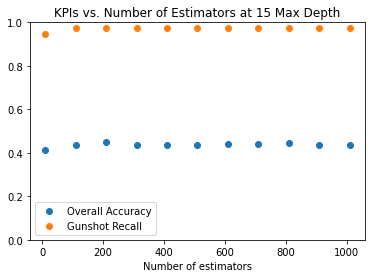

In [51]:
plt.figure()
plt.scatter(n_estimators,acc,label='Overall Accuracy')
plt.scatter(n_estimators,gsr,label='Gunshot Recall')
plt.xlabel('Number of estimators')
plt.title('KPIs vs. Number of Estimators at 15 Max Depth')
plt.legend()
plt.ylim(0,1)
plt.show()

In [82]:
maxdepths = np.arange(1,30,2)
mdacc = []
mdgsr = []
for m in maxdepths:
    print(m)
    forest = make_pipeline(RobustScaler(),RandomForestClassifier(max_depth=m, n_estimators=200,n_jobs=6))
    forest.fit(X_train,y_train)
    fpred = forest.predict(X_test)
    mdacc.append(accuracy_score(y_test,fpred))
    mdgsr.append(recall(y_test,fpred)[6])

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


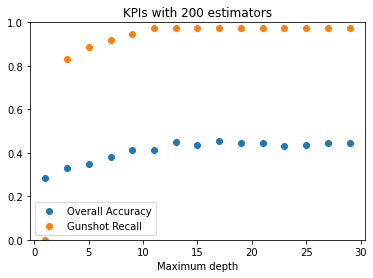

In [83]:
plt.figure()
plt.scatter(maxdepths,mdacc,label='Overall Accuracy')
plt.scatter(maxdepths,mdgsr,label='Gunshot Recall')
plt.xlabel('Maximum depth')
plt.title('KPIs with 200 estimators')
plt.legend()
plt.ylim(0,1)
plt.show()

### Tuning the Neural Network

In [70]:
nlayers = [n for n in range(1,11)]

In [71]:
nn_acc = []
nn_gsr = []

for l in nlayers:
    print(l)
    mlp = MLPClassifier(hidden_layer_sizes=(150,)*l, max_iter=100000, early_stopping=True)
    mlp.fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)
    nn_acc.append(accuracy_score(y_test,mlp_pred))
    nn_gsr.append(recall(y_test,mlp_pred)[6])

1
2
3
4
5
6
7
8
9
10


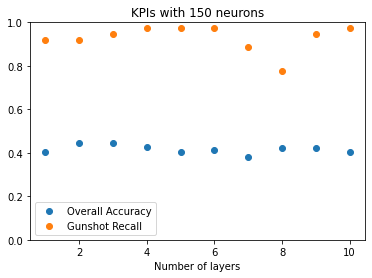

In [72]:
plt.figure()
plt.scatter(nlayers,nn_acc,label='Overall Accuracy')
plt.scatter(nlayers,nn_gsr,label='Gunshot Recall')
plt.xlabel('Number of layers')
plt.title('KPIs with 150 neurons')
plt.legend()
plt.ylim(0,1)
plt.show()

In [73]:
layersizes = [(n,) for n in np.arange(30,210,40)]

In [78]:
nnl_acc = []
nnl_gsr = []

for s in layersizes:
    print(s)
    mlp = MLPClassifier(hidden_layer_sizes=s*5, max_iter=100000, early_stopping=True)
    mlp.fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)
    nnl_acc.append(accuracy_score(y_test,mlp_pred))
    nnl_gsr.append(recall(y_test,mlp_pred)[6])

(30,)
(70,)
(110,)
(150,)
(190,)


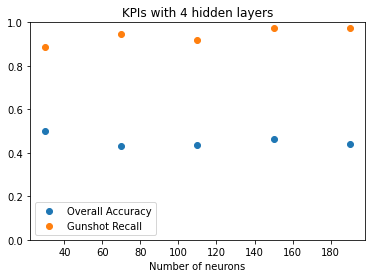

In [77]:
plt.figure()
plt.scatter([n[0] for n in layersizes],nnl_acc,label='Overall Accuracy')
plt.scatter([n[0] for n in layersizes],nnl_gsr,label='Gunshot Recall')
plt.xlabel('Number of neurons')
plt.title('KPIs with 4 hidden layers')
plt.legend()
plt.ylim(0,1)
plt.show()

So it seems that the parameters we had to begin with were quite successful for the Neural Network!

## Train models on the full dataset for use on new environmental sounds

Now that we have completed a thorough feature selection, classifier selection, and crossvalidation process, we can train a model on the full dataset and use it to make predictions. We will train two models, the NN and Random Forest classifiers, and will look at their use in the wild.

In [79]:
import pickle

In [88]:
fullX = features_df[classify_keys].values
fully = features_df['class'].values

### Train and Pickle a Full Random Forest

In [84]:
fullforest = make_pipeline(RobustScaler(),RandomForestClassifier(max_depth=15, n_estimators=200,n_jobs=4))

In [90]:
fullforest.fit(fullX, fully)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=29, n_estimators=200,
                                        n_jobs=6))])

In [95]:
with open('fullRobustScaledRandomForest.pkl','wb') as f:
    pickle.dump(fullforest,f)

### Train and Pickle a Full NN

In [96]:
fullNN = make_pipeline(RobustScaler(),MLPClassifier(hidden_layer_sizes=(150,)*5, max_iter=100000, early_stopping=True))

In [97]:
fullNN.fit(fullX, fully)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('mlpclassifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(150, 150, 150, 150, 150),
                               max_iter=100000))])

In [98]:
with open('fullRobustScaledNN.pkl','wb') as f:
    pickle.dump(fullNN,f)